# Advertising Spend Impact Analysis
## Objective - Use Multiple Linear Regression to interpret the impact of different advertising media on the sales and predict using the fitted model

## Task 1: Import the libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Task 2: Load the advertising dataset

In [19]:
df = pd.read_csv('Advertising.csv')

In [20]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Task 3: Preprocess the dataset

In [22]:
# Drop the column named "Unnamed: 0"
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Task 4: Relationship between features and response

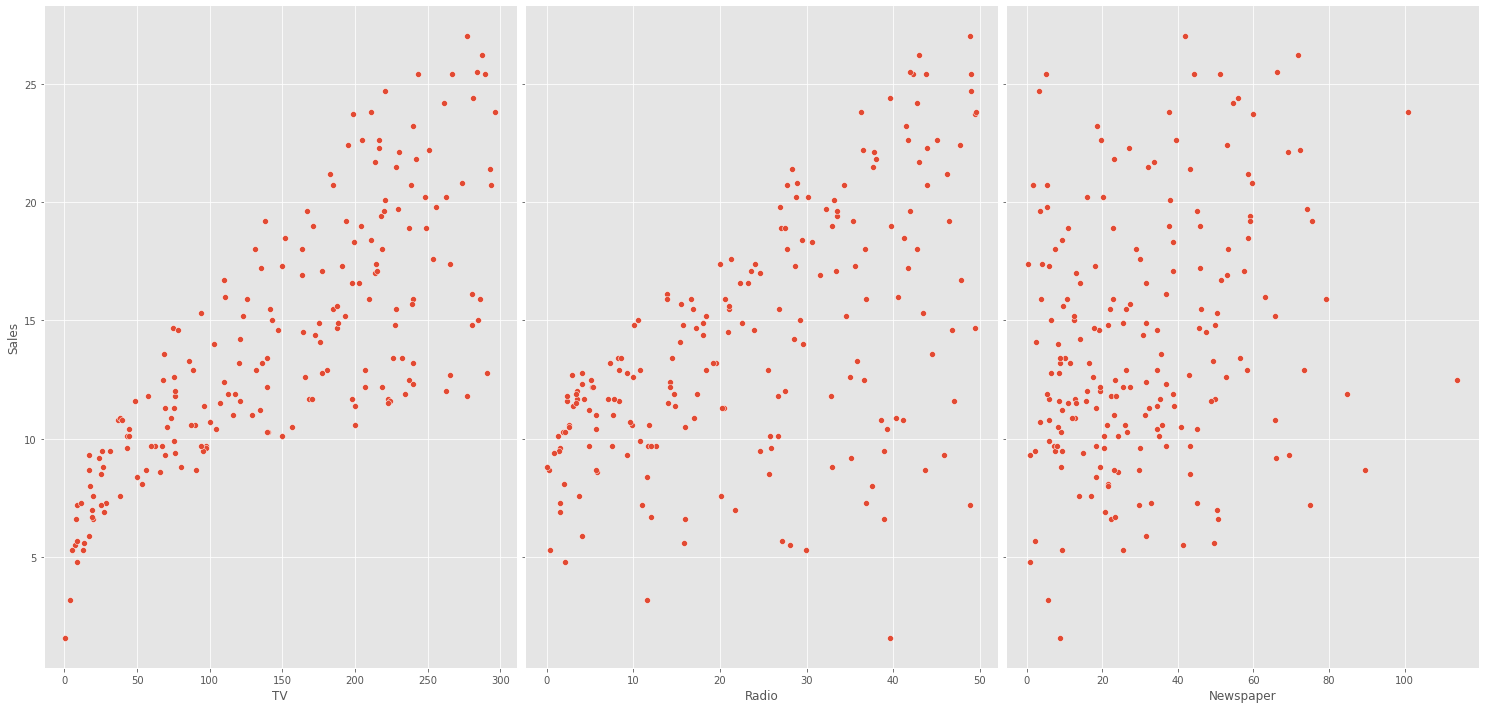

In [35]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], height=10, aspect=0.7);

## Task 5: Estimating the coefficients for a Multiple Linear Regression model

In [45]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

MLR_1 = LinearRegression()
MLR_1.fit(X, y)

print(f"The intercept estimate for the linear regression model is = {MLR_1.intercept_}")
estimates = list(zip(["TV","Radio","Newspaper"], MLR_1.coef_))
print("\nAND\n")
print(f"The coefficient estimates for each of the three predictors are - {estimates}")

The intercept estimate for the linear regression model is = 2.938889369459412

AND

The coefficient estimates for each of the three predictors are - [('TV', 0.0457646454553976), ('Radio', 0.18853001691820445), ('Newspaper', -0.0010374930424763285)]


## We can interpret the above results as follows - 
### 1. For each 1000 usd increase in the radio budget, the sales increase by approximately 188 units.
### 2. For each 1000 usd increase in the TV budget, the sales increase by approximately 45 units.
### 3. The relationship between Radio advertising spend is stronger than the TV advertising spend.
### 4. The coefficient for the Newspaper advertising spend indicates that it has no relationship with the response, i.e. the sales.
### 5. To understand why this might be the case, we can visualize the correlation matrix as below

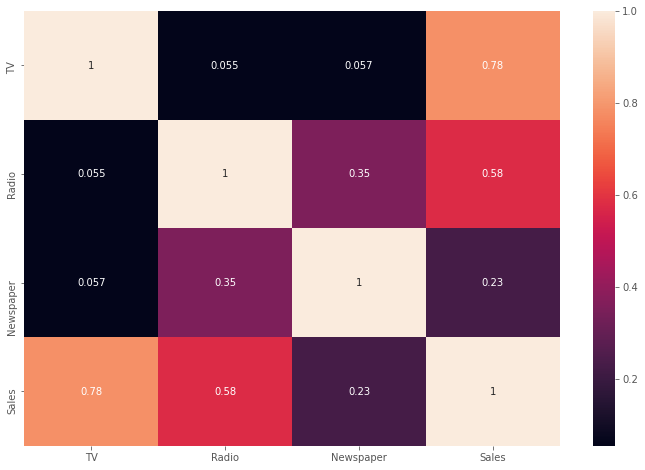

In [47]:
sns.heatmap(df.corr(), annot = True);

### The above heatmap represents the correlation matrix between the different variables( predictors + response). The value for correlation between Radio advertising spend and Newspaper advertising spend is 0.35, which indicates that where the radio advertising spend is high, the newspaper advertising spend also tends to be higher. Assuming our MLR model is correct, this accurately explains the reason why the sales do not depend on the Newspaper advertising spend.

## Task 6: Feature Selection

In [52]:
from sklearn.metrics import r2_score

#Build a model with only two predictors(Newspaper excluded)
X_2 = X[['TV','Radio']]
y_2 = y
MLR_2 = LinearRegression()
#Fit the model
MLR_2.fit(X_2, y_2)
#Predict on the training set
MLR_2_predictions = MLR_2.predict(X_2)
#Find the R^2
print(f"R^2 for model with only TV and Radio predictors: {r2_score(y_2, MLR_2_predictions)}")

#Build a model with all the three predictors
X_3 = X[['TV','Radio', 'Newspaper']]
y_3 = y
MLR_3 = LinearRegression()
#Fit the model
MLR_3.fit(X_3, y_3)
#Predict on the training set
MLR_3_predictions = MLR_3.predict(X_3)
#Find the R^2
print(f"R^2 for model with TV, Radio and Newspaper predictors: {r2_score(y_3, MLR_3_predictions)}")

R^2 for model with only TV and Radio predictors: 0.8971942610828957
R^2 for model with TV, Radio and Newspaper predictors: 0.8972106381789522


### The above result indicates that adding Newspaper as a third predictor only improves the model just slightly, which is a strong sign that we should drop it.
### Adding a predictor irrespective of its relevance to the response variable will always increase the R^2 score because more variables allow the model to fit the data more accurately(RSS will be lower than that of the previous model).

## Task 7: Model Evaluation using RMSE

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Evaluation metrics for model with all predictors
X_4 = X[['TV','Radio', 'Newspaper']]
y_4 = y

X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, random_state = 3)

MLR_4 = LinearRegression().fit(X_train, y_train)
MLR_4_predictions = MLR_4.predict(X_test)

print(f"RMSE for the model with all predictors: {np.sqrt(mean_squared_error(y_test, MLR_4_predictions))}")
print(f"R^2 score: {r2_score(y_test, MLR_4_predictions)}")

#Evaluation metrics for model with only TV and Radio predictors
X_5 = X[['TV','Radio']]
y_5 = y

X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, random_state = 3)

MLR_5 = LinearRegression().fit(X_train, y_train)
MLR_5_predictions = MLR_5.predict(X_test)

print(f"RMSE for the model with no Newspaper predictor: {np.sqrt(mean_squared_error(y_test, MLR_5_predictions))}")
print(f"R^2 score: {r2_score(y_test, MLR_5_predictions)}")

RMSE for the model with all predictors: 1.9589322974522816
R^2 score: 0.8829078884253615
RMSE for the model with no Newspaper predictor: 1.946131637578361
R^2 score: 0.8844331674270747


### Visualize the prediction error

In [65]:
!pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


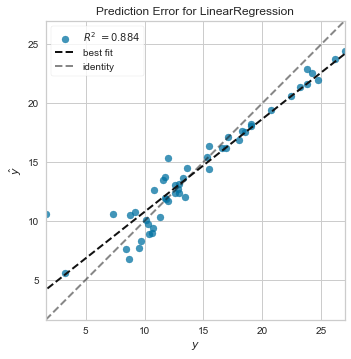

In [66]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(MLR_5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

## Task 8: Checking for the synergy effect

In [67]:
df['synergy'] = df['TV']*df['Radio']

X_6 = df[['TV','Radio','synergy']]
y_6 = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, random_state = 3)

MLR_6 = LinearRegression().fit(X_train, y_train)
MLR_6_predictions = MLR_6.predict(X_test)

print(f"RMSE for the model with synergy term: {np.sqrt(mean_squared_error(y_test, MLR_6_predictions))}")
print(f"R^2 score: {r2_score(y_test, MLR_6_predictions)}")

RMSE for the model with synergy term: 1.2767653850416136
R^2 score: 0.950259404055029


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


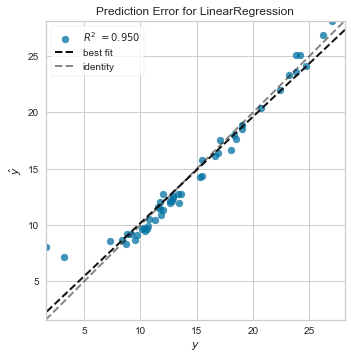

In [68]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(MLR_6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

### The above graph indicates that the model with the synergy term included almost fits the data perfectly, and therefore the prospect of the presence of a synergy between the TV advertising and Radio advertising is valid. The coefficient of the synergy term can be interpreted as follows - The increase in the effectiveness of the TV advertising for an unit increase in the Radio advertising.